In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

##### Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [3]:
claims= pd.read_csv('claims.csv')

In [4]:
cust_data = pd.read_csv('cust_demographics.csv')

In [5]:
claims.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No


In [6]:
cust_data.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver


In [7]:
cust_claims= pd.merge(claims,cust_data,left_on='customer_id',right_on='CUST_ID',how='inner')
cust_claims.head(3)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357,Female,11-Mar-84,TN,798-631-4758,Silver


In [8]:
cust_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1085 non-null   int64  
 1   customer_id          1085 non-null   int64  
 2   incident_cause       1085 non-null   object 
 3   claim_date           1085 non-null   object 
 4   claim_area           1085 non-null   object 
 5   police_report        1085 non-null   object 
 6   claim_type           1085 non-null   object 
 7   claim_amount         1020 non-null   object 
 8   total_policy_claims  1075 non-null   float64
 9   fraudulent           1085 non-null   object 
 10  CUST_ID              1085 non-null   int64  
 11  gender               1085 non-null   object 
 12  DateOfBirth          1085 non-null   object 
 13  State                1085 non-null   object 
 14  Contact              1085 non-null   object 
 15  Segment              1085 non-null   o

##### 2.Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [9]:
numeric_columns=cust_claims.select_dtypes(include=['int64','float64'])
categorical_columns = cust_claims.select_dtypes(include='object')

In [10]:
def continuous_var_summary(x):
    #freq and missings
    n_total=x.shape[0]
    n_miss=x.isna().sum()
    perc_miss=(n_miss/n_total)*100
    
    #outliers
    q1=x.quantile(0.25)
    q3=x.quantile(0.75)
    iqr=q3-q1
    lc_iqr=q1-1.5*iqr
    uc_iqr=q3+1.5*iqr
    
    return pd.Series([x.dtype, x.nunique(), n_total, x.count(), n_miss, perc_miss, x.sum(), x.mean(), x.var(), lc_iqr, uc_iqr
                     ,x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.10), x.quantile(0.25), x.quantile(0.5),
                     x.quantile(0.75), x.quantile(0.90), x.quantile(0.95), x.quantile(0.99), x.max()],
                      
                      index=['dtype', 'cardinality', 'n_tot', 'n', 'nmiss', 'perc_miss', 'sum', 'mean', 'var', 'lc_iqr', 'uc_iqr',
                            'min', 'p1','p5', 'p10', 'p25', 'p50', 'p75', 'p90', 'p95', 'p99', 'max'])

In [11]:
def categorical_var_summary(x):
    Mode=x.value_counts().sort_values(ascending=False)[0:1].reset_index()
    return pd.Series([x.count(),x.isnull().sum(),Mode.iloc[0,0],Mode.iloc[0,1],
                     round(Mode.iloc[0,1]/x.count(),2)],
                    index=['n', 'nmiss', 'Mode', 'frequency', 'Percent'])

In [12]:
numeric_audit=numeric_columns.apply(lambda x: continuous_var_summary(x))
numeric_audit

,claim_id,customer_id,total_policy_claims,CUST_ID
dtype,int64,int64,float64,int64
cardinality,1085,1078,8,1078
n_tot,1085,1085,1085,1085
n,1085,1085,1075,1085
nmiss,0,0,10,0
perc_miss,0.0,0.0,0.921659,0.0
sum,53073348315,55083176211,1706.0,55083176211
mean,48915528.400922,50767904.341935,1.586977,50767904.341935
var,848450964360648.625,812036000322492.625,1.315286,812036000322492.625
lc_iqr,-50950840.5,-48014387.5,-0.5,-48014387.5


In [13]:
categorical_audit=categorical_columns.apply(lambda x:categorical_var_summary(x))
categorical_audit

,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,fraudulent,gender,DateOfBirth,State,Contact,Segment
n,1085,1085,1085,1085,1085,1020,1085,1085,1085,1085,1085,1085
nmiss,0,0,0,0,0,65,0,0,0,0,0,0
Mode,Other causes,04/04/2018,Auto,No,Material only,$1630,No,Male,18-Oct-72,NY,743-569-4783,Gold
frequency,285,18,970,621,653,7,838,556,2,31,2,375
Percent,0.26,0.02,0.89,0.57,0.6,0.01,0.77,0.51,0.0,0.03,0.0,0.35


In [14]:
cust_claims.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver


In [15]:
cust_claims.dtypes

claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
CUST_ID                  int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
dtype: object

In [16]:
cust_claims['DateOfBirth']=pd.to_datetime(cust_claims['DateOfBirth'],format='%d-%b-%y')

In [17]:
cust_claims.loc[(cust_claims['DateOfBirth'].dt.year>2020),'DateOfBirth']=cust_claims.loc[cust_claims['DateOfBirth'].dt.year>2020]['DateOfBirth'].apply(lambda x:x-pd.DateOffset(years=100))

In [18]:
cust_claims['claim_date']=pd.to_datetime(cust_claims['claim_date'], format='%m/%d/%Y')

##### 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [19]:
cust_claims['claim_amount']=cust_claims['claim_amount'].astype('str')

In [20]:
cust_claims['claim_amount']=cust_claims['claim_amount'].str.replace('$','')

In [21]:
cust_claims['claim_amount'] = np.where(cust_claims['claim_amount']=='nan','',cust_claims['claim_amount'])

In [22]:
cust_claims['claim_amount']=pd.to_numeric(cust_claims['claim_amount'])

In [23]:
np.dtype(cust_claims['claim_amount'])

dtype('float64')

##### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims

In [24]:
cust_claims['unreported_claims']=np.where(cust_claims['police_report']=='Unknown',1,0)

In [25]:
cust_claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,unreported_claims
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,1
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,798-631-4758,Silver,0
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,0
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,19269962,Male,1977-05-13,NV,956-871-8691,Gold,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,79539873,Female,1981-03-15,ND,459-425-4319,Platinum,0
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,42364152,Female,1996-07-07,ID,529-462-1635,Silver,0
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,19888166,Male,1990-04-11,WI,712-651-9613,Gold,0
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,11256802,Female,1964-10-22,LA,469-345-5617,Silver,0


##### 5. One customer can claim for insurance more than once and in each claim,multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records inthe data based on the customer ID column.

In [26]:
cust_claims = cust_claims.drop_duplicates('customer_id',keep='last')

##### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [27]:
cust_claims.isna().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
unreported_claims       0
dtype: int64

In [28]:
cust_claims['claim_amount']=cust_claims['claim_amount'].replace(np.NaN, cust_claims['claim_amount'].mean())

C:\Users\admin\AppData\Local\Temp\ipykernel_10340\2836105064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_claims['claim_amount']=cust_claims['claim_amount'].replace(np.NaN, cust_claims['claim_amount'].mean())


In [29]:
#or
#cust_claims['claim_amount'] = np.where(pd.isna(cust_claims['claim_amount']), 
#                              cust_claims['claim_amount'].mean(), cust_claims['claim_amount'])

In [30]:
cust_claims['claim_amount'].isna().sum()

0

In [31]:
cust_claims['total_policy_claims']=cust_claims['total_policy_claims'].fillna(cust_claims['total_policy_claims'].mode()[0])

C:\Users\admin\AppData\Local\Temp\ipykernel_10340\3059169584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_claims['total_policy_claims']=cust_claims['total_policy_claims'].fillna(cust_claims['total_policy_claims'].mode()[0])


In [32]:
cust_claims['total_policy_claims']=cust_claims['total_policy_claims'].astype('str')

C:\Users\admin\AppData\Local\Temp\ipykernel_10340\412250955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_claims['total_policy_claims']=cust_claims['total_policy_claims'].astype('str')


In [33]:
cust_claims['total_policy_claims'].isna().sum()

0

##### 7. Calculate the age of customers in years. Based on the age, categorize thecustomers according to the below criteria
Children < 18
Youth 18-30
Adult 30-60
Senior > 60

In [34]:
curr_year = pd.Timestamp.now().year
#or pd.to_datetime('today').year
curr_year

2024

In [35]:
dob_year=pd.DatetimeIndex(cust_claims['DateOfBirth']).year
dob_year

Index([1979, 1970, 1999, 1999, 1993, 1966, 1985, 1999, 1990, 1963,
       ...
       1973, 1981, 1964, 1997, 1962, 1981, 1996, 1990, 1964, 1995],
      dtype='int32', name='DateOfBirth', length=1078)

In [36]:
adjusted_dob_year=np.where((dob_year>curr_year), dob_year-100, dob_year)
adjusted_dob_year

array([1979, 1970, 1999, ..., 1990, 1964, 1995])

In [37]:
cust_claims['age']=curr_year-adjusted_dob_year

C:\Users\admin\AppData\Local\Temp\ipykernel_10340\3991605903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_claims['age']=curr_year-adjusted_dob_year


In [38]:
cust_claims.head(3)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,unreported_claims,age
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,0,45
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,1,54
6,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.0,4.0,No,18401412,Male,1999-03-02,AR,752-398-2914,Gold,0,25


In [39]:
cust_claims['Age_Group']=pd.cut(cust_claims['age'],bins=[0,18,30,60,np.inf],labels=['Children','Youth','Adult','Senior'],right=False)

C:\Users\admin\AppData\Local\Temp\ipykernel_10340\2107865253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_claims['Age_Group']=pd.cut(cust_claims['age'],bins=[0,18,30,60,np.inf],labels=['Children','Youth','Adult','Senior'],right=False)


In [40]:
cust_claims.groupby('Age_Group')['age'].count()

C:\Users\admin\AppData\Local\Temp\ipykernel_10340\1420684914.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cust_claims.groupby('Age_Group')['age'].count()


Age_Group
Children      0
Youth       141
Adult       805
Senior      132
Name: age, dtype: int64

##### 8. What is the average amount claimed by the customers from various segments?

In [41]:
round(cust_claims.groupby('Segment')['claim_amount'].mean().reset_index(),2)

,Segment,claim_amount
0,Gold,12846.39
1,Platinum,12371.64
2,Silver,12267.15


##### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [42]:
incident_amount=round(cust_claims.loc[cust_claims['claim_date']<'2018-10-01',:].groupby('incident_cause')['claim_amount'].sum().add_prefix('total_'),2)
incident_amount

incident_cause
total_Crime                  728777.45
total_Driver error          3330479.37
total_Natural causes        1321162.91
total_Other causes          3970404.79
total_Other driver error    3325132.87
Name: claim_amount, dtype: float64

##### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [43]:
result = cust_claims.loc[
    (cust_claims['incident_cause'].str.lower().str.contains('driver')) & 
    ((cust_claims['State'] == 'TX') | (cust_claims['State'] == 'DE') | (cust_claims['State'] == 'AK')) 
].groupby(['State', 'Age_Group'])[['claim_amount']].count()
result

C:\Users\admin\AppData\Local\Temp\ipykernel_10340\3290172477.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ].groupby(['State', 'Age_Group'])[['claim_amount']].count()


claim_amount
State Age_Group              
AK    Children              0
      Youth                 1
      Adult                 9
      Senior                0
DE    Children              0
      Youth                 2
      Adult                10
      Senior                3
TX    Children              0
      Youth                 1
      Adult                 8
      Senior                1

In [44]:
result=cust_claims.loc[
    (cust_claims['incident_cause'].str.lower().str.contains('driver')) & 
    (cust_claims['State'].isin(['AK','DE','TX']))&
    (cust_claims['Age_Group']=='Adult')
].shape[0]
print(f"Number of adults from TX, DE, and AK who claimed insurance for driver-related issues: {result}")

Number of adults from TX, DE, and AK who claimed insurance for driver-related issues: 27


##### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [45]:
genderwise_claim_amount=round(cust_claims.groupby(['gender','Segment'])[['claim_amount']].sum(),2).reset_index()
genderwise_claim_amount

,gender,Segment,claim_amount
0,Female,Gold,2110042.41
1,Female,Platinum,2369720.43
2,Female,Silver,1897301.87
3,Male,Gold,2655966.87
4,Male,Platinum,2096443.42
5,Male,Silver,2347130.84


In [46]:
genderwise_claim_amount_pivot=genderwise_claim_amount.pivot_table(index='Segment',columns='gender',values='claim_amount')
genderwise_claim_amount_pivot

gender,Female,Male
Segment,,
Gold,2110042.41,2655966.87
Platinum,2369720.43,2096443.42
Silver,1897301.87,2347130.84


In [47]:
#.T transposes the DataFrame df, switching its rows (Gold,silver,Platinum) to columns, 
#and its columns (Female,Male) to rows.

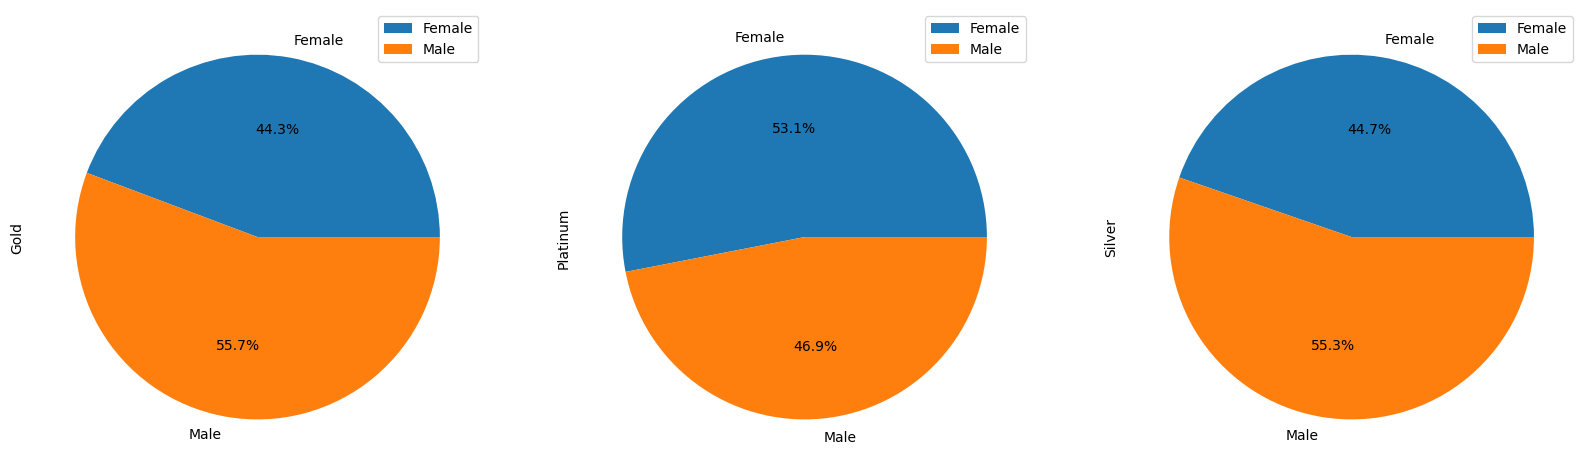

In [48]:
genderwise_claim_amount_pivot.T.plot(kind='pie', subplots=True, autopct='%1.1f%%', figsize=(20,10))
plt.show()

##### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [49]:
driver_incident_claims=cust_claims.loc[cust_claims['incident_cause'].str.lower().str.contains('driver')].groupby('gender')[['gender']].count().add_prefix('count_').reset_index()
driver_incident_claims

,gender,count_gender
0,Female,221
1,Male,281


<Axes: xlabel='gender', ylabel='count_gender'>

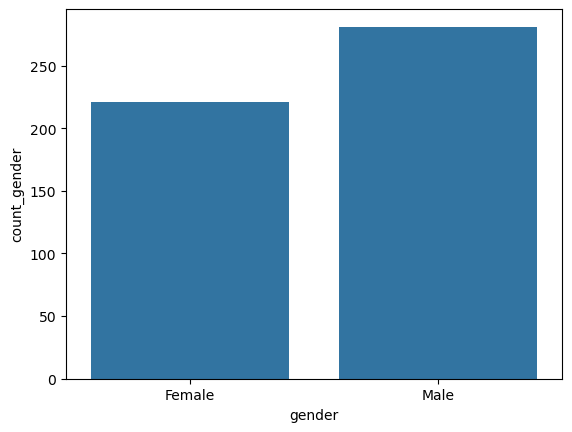

In [50]:
sns.barplot(x='gender', y='count_gender', data=driver_incident_claims)

##### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart

In [51]:
cust_claims['Frauds']=np.where(cust_claims['fraudulent']=='Yes',1,0)

C:\Users\admin\AppData\Local\Temp\ipykernel_10340\3825111286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_claims['Frauds']=np.where(cust_claims['fraudulent']=='Yes',1,0)


In [52]:
age_group_max_frauds=cust_claims.groupby('Age_Group')['Frauds'].sum().reset_index()
age_group_max_frauds

C:\Users\admin\AppData\Local\Temp\ipykernel_10340\2250678226.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_max_frauds=cust_claims.groupby('Age_Group')['Frauds'].sum().reset_index()


,Age_Group,Frauds
0,Children,0
1,Youth,25
2,Adult,185
3,Senior,35


<Axes: xlabel='Age_Group', ylabel='Frauds'>

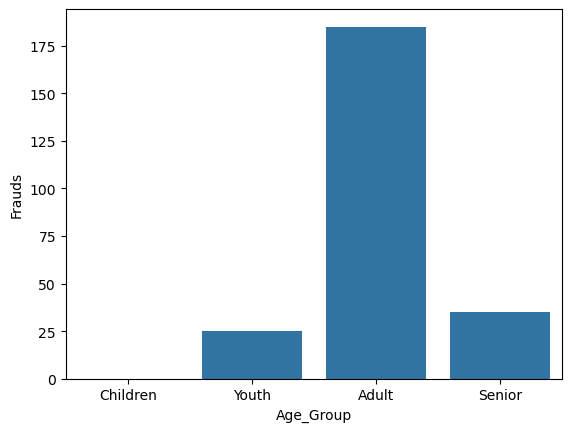

In [53]:
sns.barplot(x='Age_Group', y='Frauds', data=age_group_max_frauds)

##### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [54]:
cust_claims['Month']=cust_claims['claim_date'].dt.strftime('%B')

C:\Users\admin\AppData\Local\Temp\ipykernel_10340\2347596037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_claims['Month']=cust_claims['claim_date'].dt.strftime('%B')


In [55]:
monthwise_claim_amount=pd.pivot_table(cust_claims,index='Month',values='claim_amount')
monthwise_claim_amount

,claim_amount
Month,
April,12323.366469
August,10239.286167
December,14771.329567
February,13084.735489
January,12885.135218
July,13012.395346
June,13884.227585
March,11894.134668
May,11983.434592


In [56]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [57]:
chronological_monthwise_claim_amount = monthwise_claim_amount.reindex(new_order, axis=0)

In [58]:
round(chronological_monthwise_claim_amount,2)

,claim_amount
Month,
January,12885.14
February,13084.74
March,11894.13
April,12323.37
May,11983.43
June,13884.23
July,13012.40
August,10239.29
September,12605.10


<Axes: xlabel='Month'>

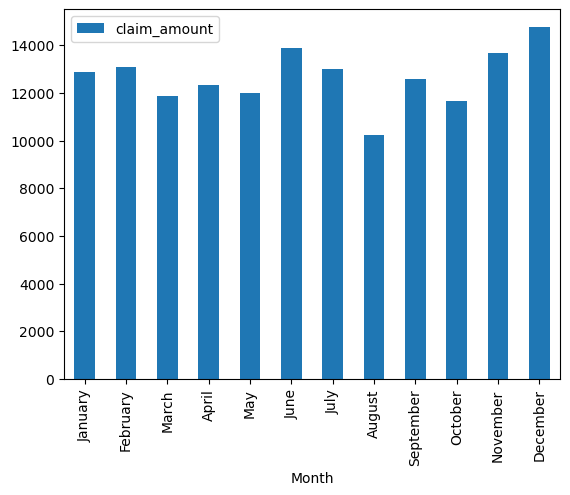

In [59]:
chronological_monthwise_claim_amount.plot(kind='bar')

##### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [60]:
cust_claims.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,...,gender,DateOfBirth,State,Contact,Segment,unreported_claims,age,Age_Group,Frauds,Month
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,...,Female,1979-01-12,VT,789-916-8172,Platinum,0,45,Adult,0,November
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,...,Female,1970-01-13,ME,265-543-1264,Silver,1,54,Adult,0,October


In [61]:
Frauds_amount_gender = pd.DataFrame(cust_claims.loc[cust_claims['fraudulent']=='Yes'].groupby(['gender','Age_Group'])[['claim_amount']].mean())

C:\Users\admin\AppData\Local\Temp\ipykernel_10340\2284761012.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Frauds_amount_gender = pd.DataFrame(cust_claims.loc[cust_claims['fraudulent']=='Yes'].groupby(['gender','Age_Group'])[['claim_amount']].mean())


In [62]:
Frauds_amount_gender

claim_amount
gender Age_Group              
Female Children            NaN
       Youth       9684.784234
       Adult      12916.527158
       Senior      4860.840909
Male   Children            NaN
       Youth       9705.044512
       Adult      15383.108727
       Senior     15424.153846

In [63]:
Non_Frauds_amount_gender = pd.DataFrame(cust_claims.loc[cust_claims['fraudulent']=='No'].groupby(['gender','Age_Group'])['claim_amount'].mean())
Non_Frauds_amount_gender

C:\Users\admin\AppData\Local\Temp\ipykernel_10340\1437760821.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Non_Frauds_amount_gender = pd.DataFrame(cust_claims.loc[cust_claims['fraudulent']=='No'].groupby(['gender','Age_Group'])['claim_amount'].mean())


claim_amount
gender Age_Group              
Female Children            NaN
       Youth      11374.338916
       Adult      12708.928430
       Senior     11588.839496
Male   Children            NaN
       Youth      13596.124136
       Adult      12221.895509
       Senior     11569.112816

In [64]:
Claims_age_gender=round(pd.merge(Frauds_amount_gender,Non_Frauds_amount_gender,on=['gender','Age_Group']),2)
Claims_age_gender

claim_amount_x  claim_amount_y
gender Age_Group                                
Female Children              NaN             NaN
       Youth             9684.78        11374.34
       Adult            12916.53        12708.93
       Senior            4860.84        11588.84
Male   Children              NaN             NaN
       Youth             9705.04        13596.12
       Adult            15383.11        12221.90
       Senior           15424.15        11569.11

In [65]:
Claims_age_gender=Claims_age_gender.rename(columns={'claim_amount_x':'Fraudulent','claim_amount_y':'Non_Fraudulent'})
Claims_age_gender

Fraudulent  Non_Fraudulent
gender Age_Group                            
Female Children          NaN             NaN
       Youth         9684.78        11374.34
       Adult        12916.53        12708.93
       Senior        4860.84        11588.84
Male   Children          NaN             NaN
       Youth         9705.04        13596.12
       Adult        15383.11        12221.90
       Senior       15424.15        11569.11

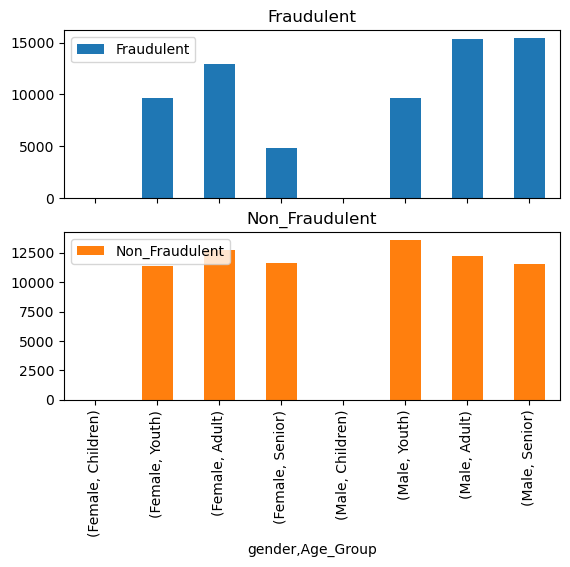

In [66]:
Claims_age_gender.plot(kind='bar',subplots=True,legend=True)
plt.show()

##### Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements.

##### 16. Is there any similarity in the amount claimed by males and females?

In [68]:
cust_claims.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,...,gender,DateOfBirth,State,Contact,Segment,unreported_claims,age,Age_Group,Frauds,Month
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,...,Female,1979-01-12,VT,789-916-8172,Platinum,0,45,Adult,0,November
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,...,Female,1970-01-13,ME,265-543-1264,Silver,1,54,Adult,0,October


In [78]:
cust_claims.columns

Index(['claim_id', 'customer_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'CUST_ID', 'gender', 'DateOfBirth', 'State', 'Contact',
       'Segment', 'unreported_claims', 'age', 'Age_Group', 'Frauds', 'Month'],
      dtype='object')

In [70]:
claim_male = cust_claims['claim_amount'].loc[cust_claims['gender']=='Male']
claim_female = cust_claims['claim_amount'].loc[cust_claims['gender']=='Female']

In [71]:
print(f"The average amount claimed by male",claim_male.mean())

The average amount claimed by male 12884.829631308417


In [73]:
print(f"The average amount claimed by female",claim_female.mean())

The average amount claimed by female 12100.692029236621


Text(0.5, 1.0, 'Distribution of Claim Amounts for Males')

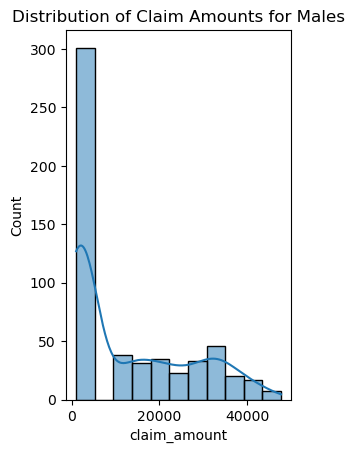

In [79]:
plt.subplot(1, 2, 1)
sns.histplot(claim_male, kde=True)
plt.title("Distribution of Claim Amounts for Males")

Text(0.5, 1.0, 'Distribution of Claim Amounts for Females')

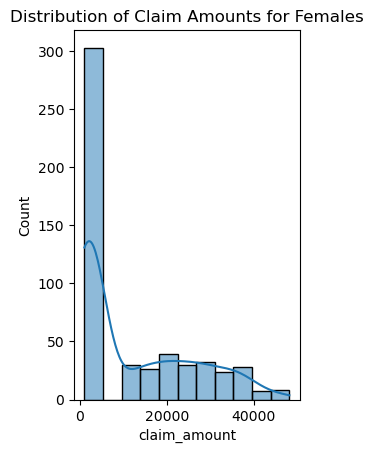

In [80]:
plt.subplot(1, 2, 2)
sns.histplot(claim_female, kde=True)
plt.title("Distribution of Claim Amounts for Females")

In [83]:
#It is not normally distributed, so we do  Mann-Whitney U test 
#If it was normally distributed- two sample -t test
from scipy.stats import mannwhitneyu


In [85]:
# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(claim_male, claim_female)
print("Mann-Whitney U test statistic:", statistic)
print("p-value:", p_value)

Mann-Whitney U test statistic: 148677.5
p-value: 0.4947405239928193


In [87]:
#interpret the results
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in the claim amounts between males and females.")
else:
    print("There is no significant difference in the claim amounts between males and females.")

There is no significant difference in the claim amounts between males and females.


In [88]:
cust_claims.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,...,gender,DateOfBirth,State,Contact,Segment,unreported_claims,age,Age_Group,Frauds,Month
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,...,Female,1979-01-12,VT,789-916-8172,Platinum,0,45,Adult,0,November
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,...,Female,1970-01-13,ME,265-543-1264,Silver,1,54,Adult,0,October


##### 17. Is there any relationship between age category and segment?

In [94]:
# To find out this relationship we will use Chi Square test

# H0= No relation between category and segment;
# Ha= There is a relationship between category and segment
agecat_seg=pd.crosstab(cust_claims['Age_Group'],cust_claims['Segment'], margins=True)
agecat_seg

Segment,Gold,Platinum,Silver,All
Age_Group,,,,
Youth,48,44,49,141
Adult,278,270,257,805
Senior,45,47,40,132
All,371,361,346,1078


In [95]:
Chi_test = stats.chi2_contingency(observed= agecat_seg)
Chi_test

Chi2ContingencyResult(statistic=0.8591966330667936, pvalue=0.9996992437870238, dof=9, expected_freq=array([[  48.52597403,   47.21799629,   45.25602968,  141.        ],
       [ 277.04545455,  269.57792208,  258.37662338,  805.        ],
       [  45.42857143,   44.20408163,   42.36734694,  132.        ],
       [ 371.        ,  361.        ,  346.        , 1078.        ]]))

In [96]:
# Print the results
print("Chi-square statistic:", Chi_test[0])
print("p-value:", Chi_test[1])
print("Degrees of freedom:", Chi_test[2])
print("Expected frequencies table:")
print(Chi_test[3])

#In this code:

#We use chi2_contingency to perform the chi-square test for independence on the contingency table agecat_seg.
#Chi_test[0] contains the chi-square statistic.
#Chi_test[1] contains the p-value.
#Chi_test[2] contains the degrees of freedom.
#Chi_test[3] contains the expected frequencies table, which shows the expected 
#counts under the assumption of independence between the two variables.


#You can interpret the results based on the chi-square statistic and p-value. 
#If the p-value is less than a chosen significance level (e.g., 0.05), you reject the null hypothesis of independence 
#and conclude that there is a significant relationship between the two variables (age category and segment). 
#Otherwise, you fail to reject the null hypothesis, indicating no significant relationshi



Chi-square statistic: 0.8591966330667936
p-value: 0.9996992437870238
Degrees of freedom: 9
Expected frequencies table:
[[  48.52597403   47.21799629   45.25602968  141.        ]
 [ 277.04545455  269.57792208  258.37662338  805.        ]
 [  45.42857143   44.20408163   42.36734694  132.        ]
 [ 371.          361.          346.         1078.        ]]


In [98]:
print("Since the significance value of the test is greter than 0.05, we fail reject the null hypothesis. Therefore there is no relationship between age category and segment")

Since the significance value of the test is greter than 0.05, we fail reject the null hypothesis. Therefore there is no relationship between age category and segment


##### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [99]:
cust_claims.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1078 entries, 0 to 1084
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1078 non-null   int64         
 1   customer_id          1078 non-null   int64         
 2   incident_cause       1078 non-null   object        
 3   claim_date           1078 non-null   datetime64[ns]
 4   claim_area           1078 non-null   object        
 5   police_report        1078 non-null   object        
 6   claim_type           1078 non-null   object        
 7   claim_amount         1078 non-null   float64       
 8   total_policy_claims  1078 non-null   object        
 9   fraudulent           1078 non-null   object        
 10  CUST_ID              1078 non-null   int64         
 11  gender               1078 non-null   object        
 12  DateOfBirth          1078 non-null   datetime64[ns]
 13  State                1078 non-null   o

In [101]:
claims_2016_17 = cust_claims[(cust_claims['claim_date']>='2016-04-01') & (cust_claims['claim_date']<='2017-03-31') ]['claim_amount']
claims_2016_17

20      12501.489635
38       1890.000000
46      32630.000000
63       2910.000000
67      25830.000000
            ...     
1066     2323.000000
1069     2670.000000
1076     1380.000000
1078     2320.000000
1084     1490.000000
Name: claim_amount, Length: 163, dtype: float64

In [103]:
#current year=2018 , acc to given data
current_year_claims = cust_claims[cust_claims['claim_date'].dt.year == 2018]['claim_amount']
current_year_claims

1        2980.0
6        1730.0
7        1160.0
8        2620.0
10       1495.0
         ...   
1073     2730.0
1074    33330.0
1075     2780.0
1077     2290.0
1080     1770.0
Name: claim_amount, Length: 484, dtype: float64

In [106]:
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(current_year_claims, claims_2016_17, equal_var=False)

# Print the results
print("Two-sample t-test:")
print("t-statistic:", t_stat)
print("p-value:", p_value)

Two-sample t-test:
t-statistic: 1.179520380284956
p-value: 0.23914935879823024


In [107]:
# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("The current year has shown a significant rise in claim amounts compared to the 2016-17 fiscal average.")
else:
    print("There is no significant rise in claim amounts compared to the 2016-17 fiscal average.")

There is no significant rise in claim amounts compared to the 2016-17 fiscal average.


##### 19. Is there any difference between age groups and insurance claims?

In [123]:
age_group_1 = cust_claims['total_policy_claims'].loc[cust_claims['Age_Group']=="Youth"]
age_group_2 = cust_claims['total_policy_claims'].loc[cust_claims['Age_Group']=="Adult"]
# Perfrom the Anova
cust_claims['total_policy_claims']=pd.to_numeric(cust_claims['total_policy_claims'])

anova = stats.f_oneway(age_group_1,age_group_2)



# Statistic :  F Value
f = anova.statistic
p = anova.pvalue
print("The f-value is {} and the p value is {}".format(f,p))
if(p<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

The f-value is 0.7257860470318823 and the p value is 0.39446858447695
We fail to reject null hypothesis


C:\Users\admin\AppData\Local\Temp\ipykernel_10340\53265074.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_claims['total_policy_claims']=pd.to_numeric(cust_claims['total_policy_claims'])


In [124]:
print("Since the significance value of the test is greater than 0.05, we fail reject the null hypothesis. Therefore, there is no difference between age groups and insurance claims or No influence of age groups on insurance claims")


Since the significance value of the test is greater than 0.05, we fail reject the null hypothesis. Therefore, there is no difference between age groups and insurance claims or No influence of age groups on insurance claims


In [125]:
cust_claims.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,...,gender,DateOfBirth,State,Contact,Segment,unreported_claims,age,Age_Group,Frauds,Month
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,...,Female,1979-01-12,VT,789-916-8172,Platinum,0,45,Adult,0,November
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,...,Female,1970-01-13,ME,265-543-1264,Silver,1,54,Adult,0,October


##### 20. Is there any relationship between total number of policy claims and the claimed amount?

In [127]:
#Convert to numeric if policy claim and claim amout are not numerics

#The result will be a single number between -1 and 1, indicating the strength and 
#direction of the linear relationship between the two variables. A positive value indicates a positive correlation, 

#a negative value indicates a negative correlation, 

#and a value close to zero indicates no correlation.

correlation_coefficient = cust_claims['total_policy_claims'].corr(other = cust_claims['claim_amount'])
print("Correlation coefficient:", correlation_coefficient)

Correlation coefficient: -0.022392720732099903


In [128]:
print("There is no relationship between total number of policy claims and the claimed amount")

There is no relationship between total number of policy claims and the claimed amount
